Caso Practico Titanic:
    Informacion de las columnas
    Survival: Survival
    PassengerId: Id único de un pasajero.
    pclass: Clase de boleto
    sexo: Sexo
    Edad: Edad en años
    sibsp: # de hermanos/cónyuges a bordo del Titanic
    parch: # de padres/hijos a bordo del Titanic
    boleto: Número de boleto
    fare: Tarifa de pasajeros
    cabina: Número de cabina
    embarcada: Puerto de embarque

In [ ]:
#https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [35]:
import os
import sys
# procesamiento de datos
import pandas as pd
#algebra lineal
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import  style
import seaborn as sns
#algoritms
from  sklearn import linear_model
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [36]:
os.getcwd()
os.chdir('D:\\jeiner\\jeinercastro\\datascience\\laboratorio1\\data')

In [37]:
# Obtener el data set de pruebas y entrenamiento
f_train = 'train.csv'
f_test = 'test.csv'
df_train = pd.read_csv(f_train)
df_test = pd.read_csv(f_test)


In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [42]:
df_train.isnull().sum() * 100 / len(df_train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [43]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1,1).sort_values(ascending=False))
missing_data = pd.concat([total,percent_2], axis=1, keys=['total', '%'])
missing_data.head(12)

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [44]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

C:\Users\Developer1\AppData\Local\Temp\ipykernel_15556\1731898824.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
C:\Users\Developer1\AppData\Local\Temp\ipykernel_15556\1731898824.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

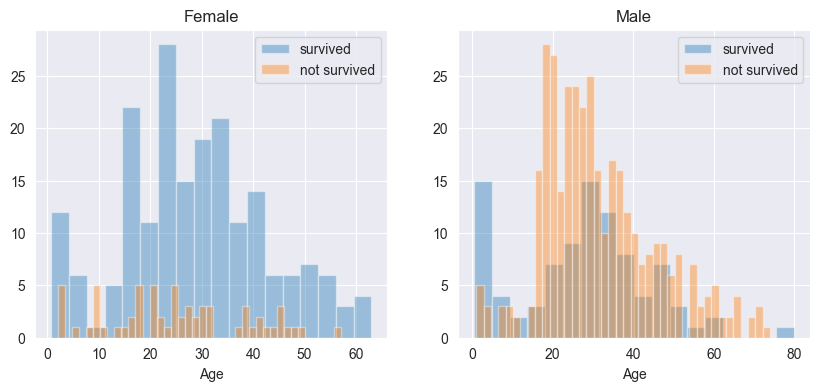

In [46]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df_train[df_train['Sex'] == 'female']
men = df_train[df_train['Sex'] == 'male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [47]:
FacetGrid = sns.FacetGrid(df_train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

TypeError: __init__() got an unexpected keyword argument 'size'

<Axes: xlabel='Pclass', ylabel='Survived'>

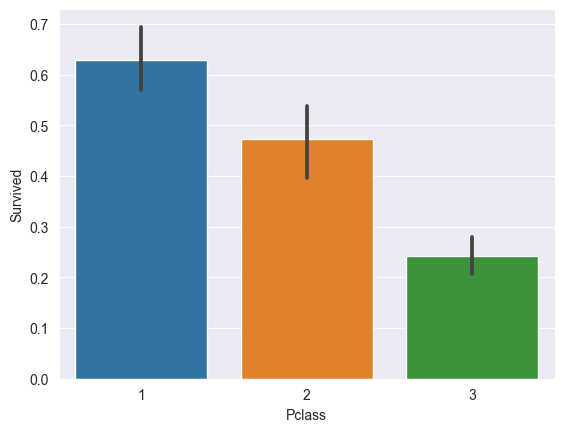

In [48]:
sns.barplot(x='Pclass', y='Survived', data=df_train)


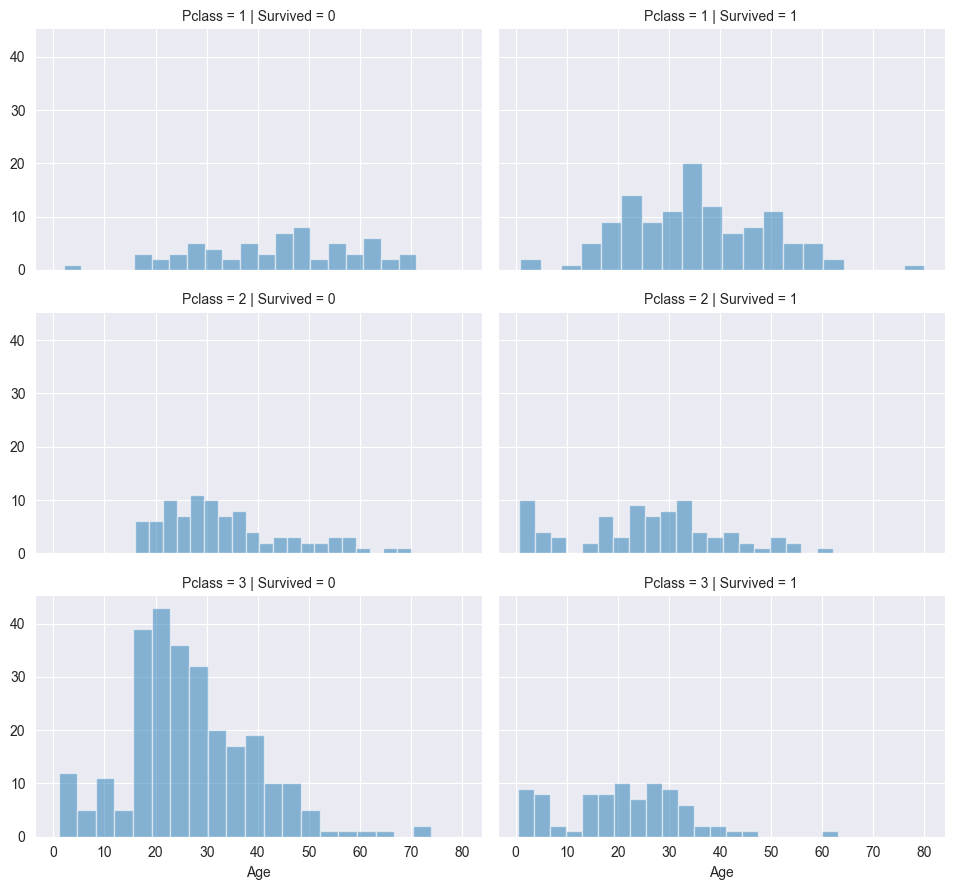

In [49]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', aspect=1.6 )
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [50]:
data = [df_train, df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] ==0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

df_train['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

In [51]:
df_train = df_train.drop(['PassengerId'], axis=1)

In [52]:
data = [df_train, df_test]
for dataset in data:
    mean = df_train['Age'].mean()
    std = df_test['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size=is_null)
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = df_train['Age'].astype(int)

df_train['Age'].isnull().sum()

0

In [53]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [54]:
commom_values = 'S'
data = [df_train, df_test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(commom_values)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Cabin      204 non-null    object 
 10  Embarked   891 non-null    object 
 11  relatives  891 non-null    int64  
 12  not_alone  891 non-null    int32  
dtypes: float64(1), int32(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
data = [df_train, df_test]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [56]:
data = [df_train, df_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', \
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = df_train.drop(['Name'], axis=1)
test_df = df_test.drop(['Name'], axis=1)

In [58]:
genders = {"male": 0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [59]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [60]:
train_df = df_train.drop(['Ticket'], axis=1)
test_df = df_test.drop(['Ticket'], axis=1)

In [61]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [62]:
data = [df_train, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [63]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Title
0,0,3,"Braund, Mr. Owen Harris",NaN,22,1,0,7,NaN,S,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38,1,0,71,C85,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",NaN,26,0,0,7,NaN,S,0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35,1,0,53,C123,S,1,0,3
4,0,3,"Allen, Mr. William Henry",NaN,35,0,0,8,NaN,S,0,1,1
5,0,3,"Moran, Mr. James",NaN,40,0,0,8,NaN,Q,0,1,1
6,0,1,"McCarthy, Mr. Timothy J",NaN,54,0,0,51,E46,S,0,1,1
7,0,3,"Palsson, Master. Gosta Leonard",NaN,2,3,1,21,NaN,S,4,0,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",NaN,27,0,2,11,NaN,S,2,0,3
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",NaN,14,1,0,30,NaN,C,1,0,3
